# SdF3: Bepaling van de geluidsnelheid in lucht
In deze demo bepalen we de geluidsnelheid in lucht. In de demo blaas je over verschillende PVC buisjes met bekende (gemeten) lengte. De frequentie wordt gemeten met de geluid autocorrelatie in de Phyphox app. Na het invoeren van de lengte van de buisjes en de bijbehorende frequenties hoef je alle cellen te 'runnen' en de grafieken worden getoond en de geluidsnelheid berekend. Daarbij wordt onderzocht of er sprake is van een systematische fout in de golflengte.

In [1]:
#Importeren van de benodigde libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from scipy.stats import norm

In [2]:
#invoeren van de data
L = np.array([9.9, 19.8, 25.0, 29.9, 37.4])*1e-2 #lengte van de pvc buisjes in cm
f_0 = np.array([800, 416, 335, 282, 224]) #gemeten frequenties in Hz

lambda_f_0 = 4*L

In [11]:
print(4*L*f_0)

[316.8   329.472 335.    337.272 335.104]


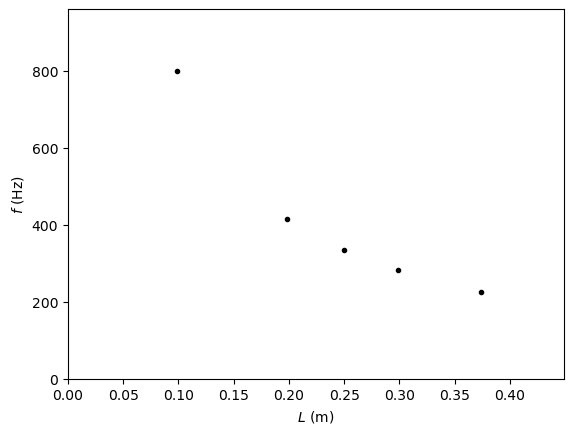

In [3]:
#plotten van de data
plt.figure()
plt.xlabel('$L$ (m)')
plt.ylabel('$f$ (Hz)')

plt.plot(L,f_0,'k.')
plt.xlim(0,1.2*max(L))
plt.ylim(0,1.2*max(f_0))
plt.show()

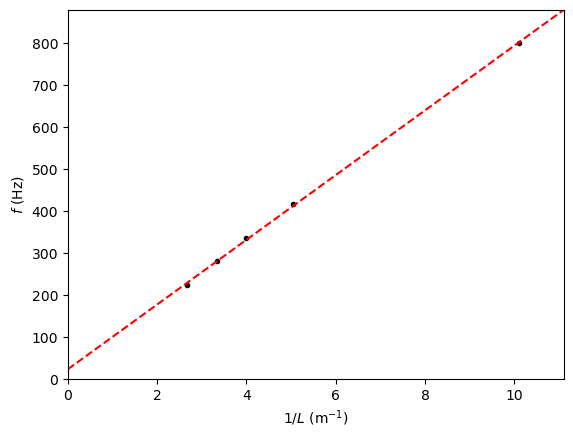

In [7]:
#plotten van de data, maar dan f tegen 1/L.
def linfit(x,a,b):
    return a*x+b

var_lin, cov_lin = curve_fit(linfit,1/L,f_0)

x_test = np.linspace(0,1.2*max(1/L),1000)
y_test = linfit(x_test,*var_lin)

plt.figure()
plt.plot(1/L,f_0,'k.')plt.plot(x_test,y_test,'r--')
plt.xlabel('$1/L$ (m$^{-1}$)')
plt.ylabel('$f$ (Hz)')
plt.xlim(0,1.1*max(1/L))
plt.ylim(0,1.1*max(f_0))
plt.show()

In [6]:
#Het fitten van data op basis van het fysisch model (met correctie voor systematische fout in L)
def funcfit(x,v,dl):
    return v/(x+dl)

var, cov = curve_fit(funcfit,lambda_f_0,f_0,p0=[343,2e-2]) #bepalen van de waarden voor v en dL

print('De geluidsnelheid in lucht is:', round(var[0],0),'+/-',round(np.sqrt(cov[0,0]),0),'m/s')

De geluidsnelheid in lucht is: 346.0 +/- 2.0 m/s


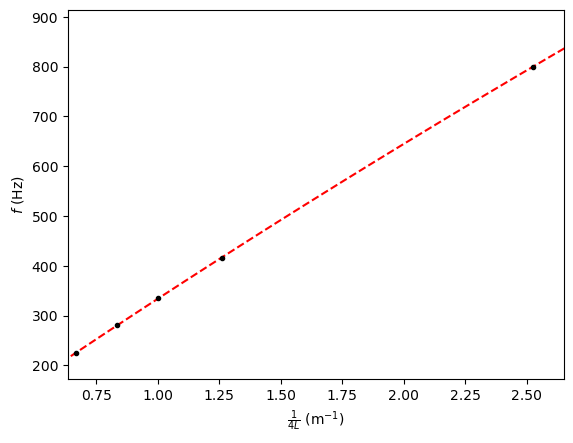

In [8]:
#plotten van de data en de verkregen fit
x = np.linspace(0.9*min(lambda_f_0),1.1*max(lambda_f_0))
y = funcfit(x,var[0],var[1])

plt.figure()
plt.xlabel('$\\frac{1}{4L}$ (m$^{-1}$)')
plt.ylabel('$f$ (Hz)')

plt.plot(1/x,y,'r--')
plt.plot(1/lambda_f_0,f_0,'k.')
plt.xlim([0.95*min(1/lambda_f_0),1.05*max(1/lambda_f_0)])

plt.show()